In [2]:
#!pip install pywaffle
#!pip install geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywaffle as pyw
#import geopandas as gpd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

custom_colors = ["#020e8a", "#0025c7","#50e0ef","#ff5700","#ffbd05"]

In [3]:
# Reading the data
data = pd.read_csv("datalabels.csv",dtype=str)
data.shape

(2131, 198)

In [4]:
internet = data[data['Q26 - Which of the following subscriptions does your household purchase?-Home internet'] == 'Yes']
internet.head()

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,QNEW2 - How old are the children in your home?-5-9 years,QNEW2 - How old are the children in your home?-10-13 years,QNEW2 - How old are the children in your home?-14-18 years,QNEW2 - How old are the children in your home?-19-25 years,QNEW2 - How old are the children in your home?-26+ years,QNEW2 - How old are the children in your home?-Don't Know,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the followin

In [5]:
# Slice out all demographic data
df_dmg = internet.iloc[:,1:17,]

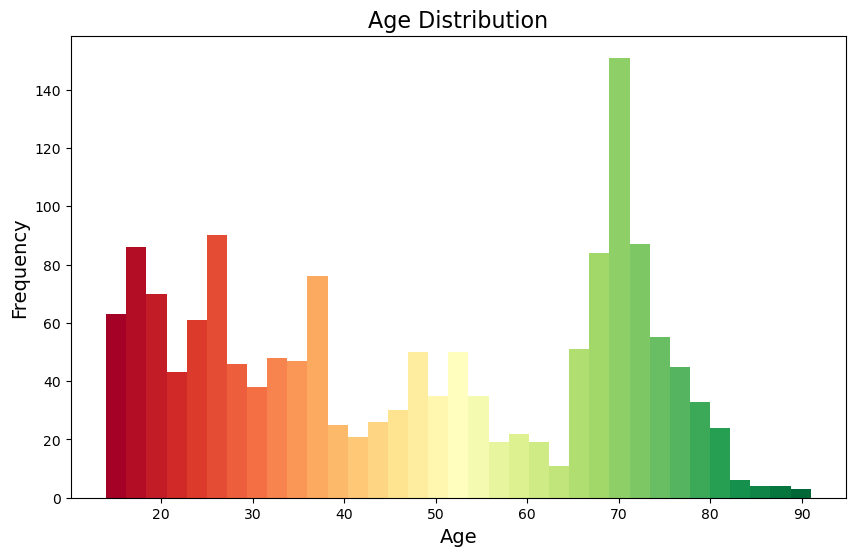

In [6]:
plt.figure(figsize=(10,6))

# Color map
cm = plt.cm.get_cmap('RdYlGn')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Age Distribution', fontsize=16)

n, bins, patches = plt.hist(df_dmg['Q1r1 - To begin, what is your age?'].astype(float), 35, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.show()

In [7]:
counts = df_dmg['Q4 - What is your gender?'].value_counts()
gender_df = pd.DataFrame(counts)
gender_df['percent'] = (gender_df['Q4 - What is your gender?'] /gender_df['Q4 - What is your gender?'].sum()) * 100

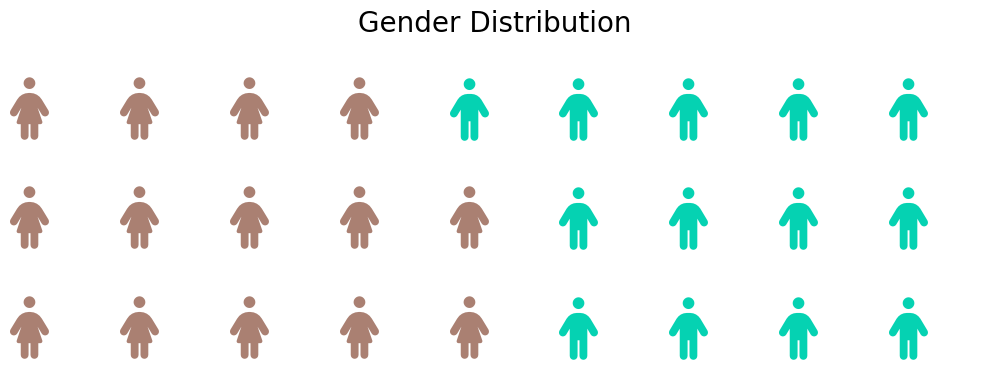

In [8]:
fig = plt.figure(
    FigureClass=pyw.Waffle, 
    rows=3, 
    columns = 9,
    values=gender_df['percent'], 
    colors=("#AA8072", "#05D2B2"),
    title={'label': 'Gender Distribution', 'loc': 'center','size':20},
    #labels=[f"{k} ({'{:.2f}'.format(v)}%)" for k, v in zip(gender_df.index, gender_df.percent)],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons=['female','male'], 
    icon_size=45, 
    icon_legend=True,
    figsize=(10, 8)
)

plt.show()

In [9]:
# Get region count
counts = df_dmg['region - Region'].value_counts()
region_df = pd.DataFrame(counts)
region_df['percent'] = (region_df['region - Region'] /region_df['region - Region'].sum())

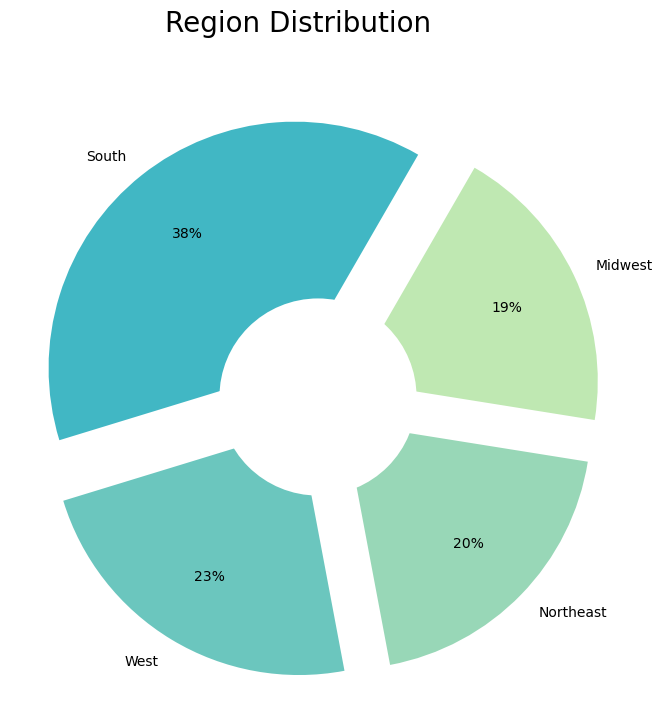

In [10]:
# Plot distribution
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Region Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15)
labels = ['South', 'West', 'Northeast', 'Midwest']
sizes = region_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

In [11]:
# Get employment status count
counts = df_dmg['QNEW3 - What is your employment status?'].value_counts()
status_df = pd.DataFrame(counts)
status_df['percent'] = (status_df['QNEW3 - What is your employment status?'] /status_df['QNEW3 - What is your employment status?'].sum())
status_df['percent']

Employed full-time or part-time    0.396662
Retired                            0.322208
Student                            0.116175
Unemployed                         0.099487
Self-employed                      0.065469
Name: percent, dtype: float64

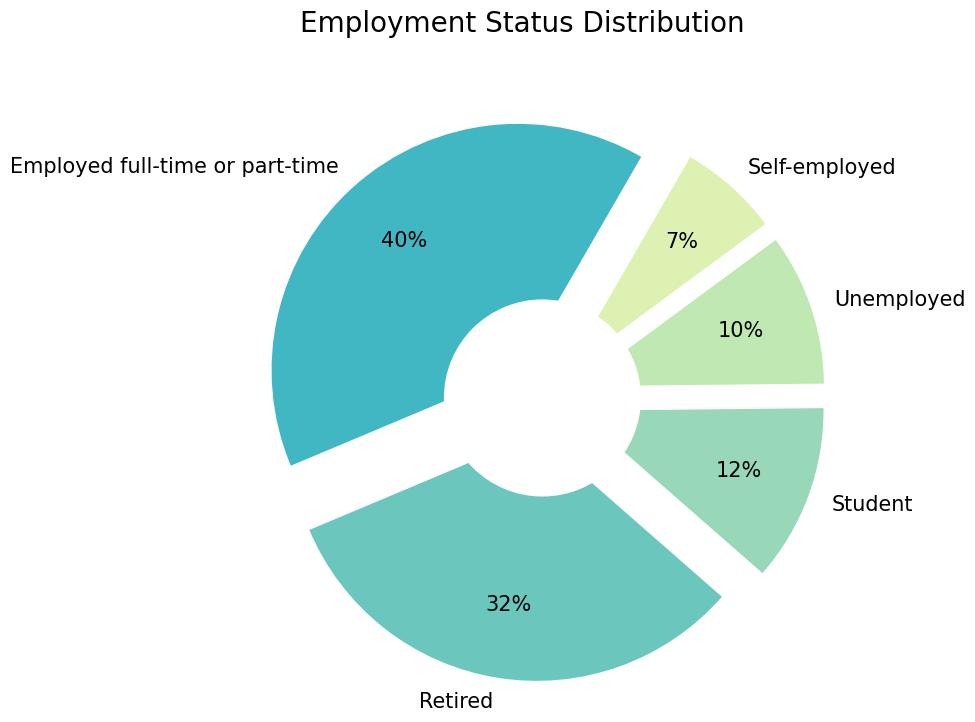

In [12]:
# Plot distribution
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Employment Status Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15, 0.15)
labels = ['Employed full-time or part-time', 'Retired', 'Student','Unemployed','Self-employed']
sizes = status_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# Adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

In [13]:
# Get income count 
counts = df_dmg['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].value_counts()
income_df = pd.DataFrame(counts)
income_df['percent'] = (income_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'] /income_df['Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.'].sum())
income_df['percent']

$50,000 to $99,999      0.366496
$30,000 to $49,999      0.208601
Less than $29,999       0.195764
$100,000 to $299,999    0.165597
Do not know             0.053273
More than $300,000      0.010270
Name: percent, dtype: float64

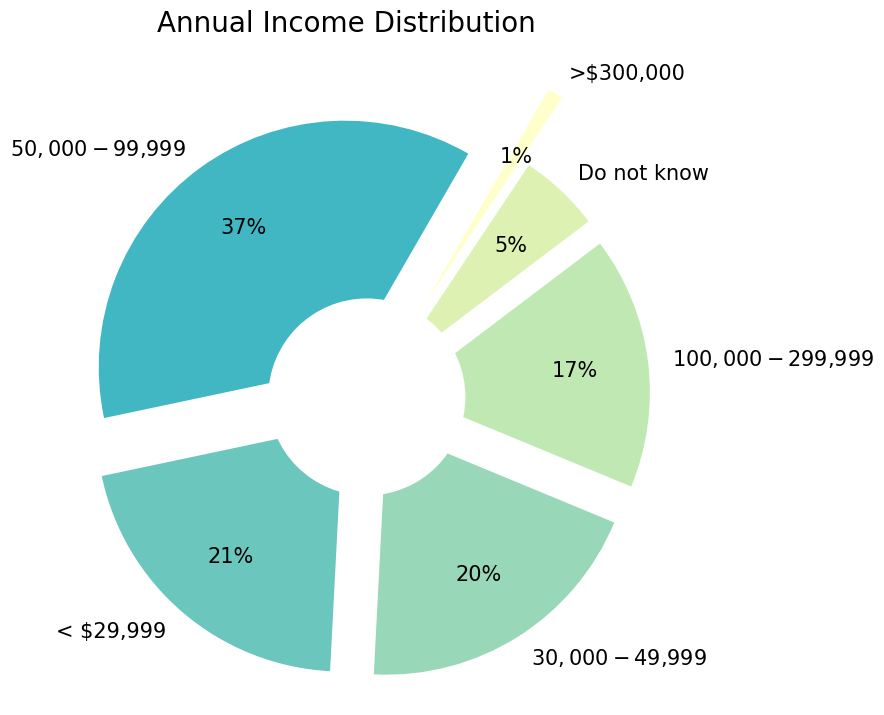

In [14]:
# Plot distribution
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Annual Income Distribution', size = 20, color = 'black')
explode = (0.15, 0.15, 0.15, 0.15, 0.15, 0.45)
labels = ['$50,000 - $99,999', '< $29,999', '$30,000 - $49,999','$100,000 - $299,999','Do not know','>$300,000']
sizes = income_df['percent']
colors = ['#41B7C4', '#6BC6BE', '#98D7B7', '#BFE8B2','#DDF2B2','#FFFFCB']
ax.pie(sizes, explode=explode, startangle=60,colors = colors, labels=labels,autopct='%1.0f%%', pctdistance=0.7)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
# adjust the data label size
plt.rcParams['font.size'] = 15
plt.show()

In [15]:
# Get ethnicity count 
counts = df_dmg['Q5 - Which category best describes your ethnicity?'].value_counts()
eth_df = pd.DataFrame(counts)
eth_df['percent'] = (eth_df['Q5 - Which category best describes your ethnicity?'] /eth_df['Q5 - Which category best describes your ethnicity?'].sum())
eth_df['percent']

White or Caucasian (Non-Hispanic)                                                   0.708601
African American                                                                    0.120668
Hispanic                                                                            0.098203
Multiracial                                                                         0.020539
East Asian or Southeast Asian                                                       0.019255
Caribbean                                                                           0.009628
Something else not listed here                                                      0.008986
South Asian (India, Pakistan, Sri Lanka)                                            0.006418
Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)    0.005135
Middle Eastern                                                                      0.002567
Name: percent, dtype: float64

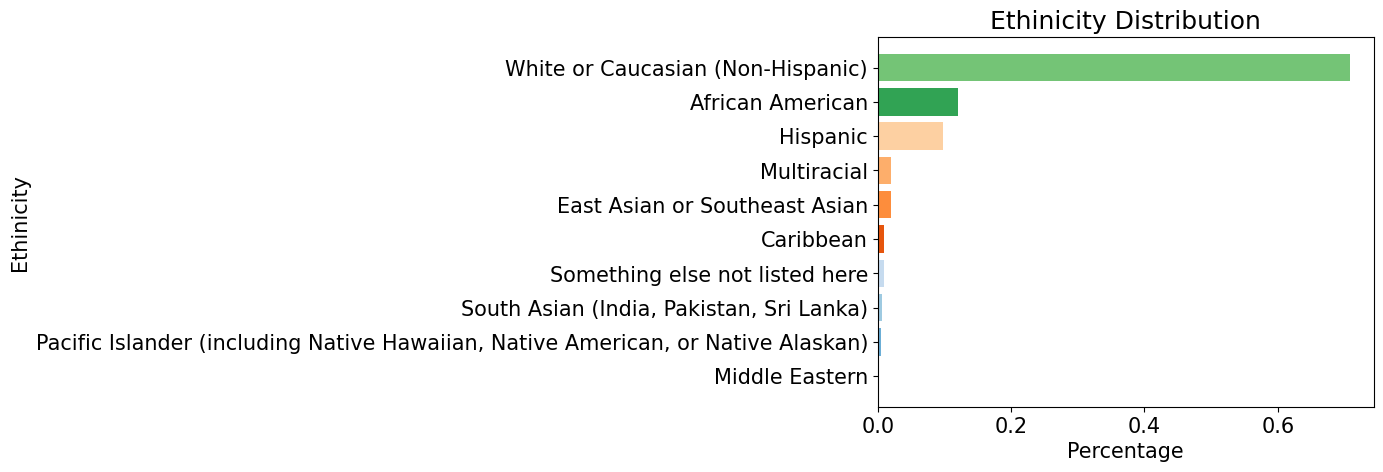

In [16]:
# Sort the dataframe 
eth_df.sort_values(by='percent', ascending=True, inplace=True)

# Create a color palette
palette = sns.color_palette("tab20c", len(eth_df['percent']))

# Create a horizontal bar plot
plt.barh(eth_df.index, eth_df['percent'], color=palette)

# Add labels and title
plt.title('Ethinicity Distribution')
plt.xlabel('Percentage')
plt.ylabel('Ethinicity')
plt.show()

In [17]:
#internet.head()
internet = internet.replace("#NULL!", np.nan)

In [18]:
missing_count = internet.isna().sum()
missing_df = pd.concat([missing_count.rename('MC'),missing_count.div(len(internet)).rename('MR')],axis = 1)
missing_df = missing_df.loc[missing_count.ne(0)]

#color the background of cells in a dataframe depending on the value of the data in each column 
missing_df.style.background_gradient(cmap="Reds")

,MC,MR
QNEW2 - How old are the children in your home?-0-4 years,978,0.627728
QNEW2 - How old are the children in your home?-5-9 years,978,0.627728
QNEW2 - How old are the children in your home?-10-13 years,978,0.627728
QNEW2 - How old are the children in your home?-14-18 years,978,0.627728
QNEW2 - How old are the children in your home?-19-25 years,978,0.627728
QNEW2 - How old are the children in your home?-26+ years,978,0.627728
QNEW2 - How old are the children in your home?-Don't Know,978,0.627728
"Q11r1 - Flat panel television - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. Th",948,0.608472
"Q11r2 - Digital video recorder (DVR) - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to ra",1433,0.919769
"Q11r3 - Streaming media box or over-the-top box - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selectio",1479,0.949294


In [19]:
internet = internet.drop(missing_df[missing_df['MR'] > 0.60].index, axis=1)
# Drop > 60% missing

In [20]:
internet = internet.drop('record - Record number', axis=1)
internet = internet.drop('FINAL WEIGHTS', axis=1)

In [21]:
missing_count = internet.isna().sum()
missing_df = pd.concat([missing_count.rename('MC'),missing_count.div(len(internet)).rename('MR')],axis = 1)
missing_df = missing_df.loc[missing_count.ne(0)]

#color the background of cells in a dataframe depending on the value of the data in each column 
missing_df.style.background_gradient(cmap="Reds")

,MC,MR
"Q11r10 - Laptop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. The fir",815,0.523107
"Q11r15 - Smartphone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in th",659,0.422978
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Photo/video,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Banking,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Fitness/health,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Food/drink,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Retail/shopping,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Navigation,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Social networks,412,0.264442
Q22 - What types of apps do you use frequently (everyday/weekly) on your smartphone?-Reading books,412,0.264442


In [22]:
internet.iloc[:,51:53]

,"Q11r10 - Laptop computer - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in the order you wish to rank. The fir","Q11r15 - Smartphone - Of the products you indicated you own, which [totalcount] do you value the most? Please rank the top [totalcount], with ""1"" being the most valued. Make your selections by clicking each item in th"
1,3,1
3,NaN,NaN
4,1,3
9,NaN,1
10,NaN,1
...,...,...
2126,1,NaN
2127,2,3
2128,NaN,NaN
2129,NaN,NaN


In [23]:
# This needs some lame work before. Automate! 
internet.iloc[:, 51:53] = internet.iloc[:,51:53].fillna(value=4)
internet.iloc[:, 65:102] = internet.iloc[:, 65:102].fillna(value=-9999)
internet.iloc[:, 114:116] = internet.iloc[:,114:116].fillna(value=4)
internet.iloc[:, 117:119] = internet.iloc[:,117:119].fillna(value=4)

In [24]:
internet = internet.rename(columns={'Q1r1 - To begin, what is your age?': 'Age'})
df_num_age = pd.DataFrame(internet.iloc[:, 0])
df_num_age

,Age
1,26.0
3,25.0
4,28.0
9,16.0
10,32.0
...,...
2126,14.0
2127,70.0
2128,18.0
2129,79.0


In [25]:
df_num_time = internet.iloc[:, 53:65]
df_num_time

,"Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q17r1 - Smartphone - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r2 - Tablet - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r3 - Laptop/Desktop - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r4 - Television - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?"
1,40.0,30.0,30.0,0.0,40.0,30.0,30.0,0.0,30.0,30.0,40.0,0.0
3,10.0,25.0,15.0,50.0,10.0,15.0,0.0,75.0,0.0,25.0,0.0,75.0
4,10.0,0.0,10.0,80.0,5.0,0.0,0.0,95.0,10.0,0.0,0.0,90.0
9,5.0,80.0,0.0,15.0,0.0,0.0,0.0,100.0,0.0,80.0,0.0,20.0
10,30.0,0.0,70.0,0.0,40.0,0.0,60.0,0.0,20.0,0.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2126,0.0,25.0,55.0,20.0,0.0,30.0,40.0,30.0,0.0,30.0,40.0,30.0
2127,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2128,0.0,0.0,0.0,0.0,0.0,10.0,0.0,90.0,0.0,20.0,0.0,80.0
2129,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0


In [26]:
# Concat numerical data

df_num = pd.concat([df_num_age,df_num_time], axis = 1)
df_num[:] = df_num[:].astype('float64') 

In [27]:
cat_cols = [col for col in internet.columns if col not in df_num.columns]

# Create dataframe of categorical data

df_cat = internet[cat_cols]
df_cat # We have age already, we can probably drop 2nd column 

,Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray dis

In [28]:
# Statistics of numerical data

df_num.astype(float).describe()

,Age,"Q15r1 - Smartphone - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r2 - Tablet - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r3 - Laptop/Desktop - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q15r4 - Television - Of the time you spend watching movies, what percentage of time do you watch on the following devices?","Q16r1 - Smartphone - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r2 - Tablet - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r3 - Laptop/Desktop - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q16r4 - Television - Of the time you spend watching sports, what percentage of time do you watch on the following devices?","Q17r1 - Smartphone - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r2 - Tablet - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r3 - Laptop/Desktop - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?","Q17r4 - Television - Of the time you spend watching TV shows , what percentage of time do you watch on the following devices?"
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000
mean,47.308087,9.435815,7.626444,23.329910,47.284339,7.505135,4.681643,16.077022,40.221438,9.088575,7.664313,22.520539,51.291399
std,21.493291,19.208739,17.758325,33.136552,43.848890,18.518152,14.174210,30.416809,45.564909,19.836742,19.240149,33.813771,44.747401
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,0.000000,0.000000,0.500000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
75%,69.000000,10.000000,5.000000,40.000000,100.000000,0.000000,0.000000,20.000000,100.000000,10.000000,0.000000,35.000000,100.000000
max,91.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [29]:
# Statistics of categorical data

df_cat.astype(str).describe()

,Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray dis

Function for plotting histogram and kernel distribution function (KDF) 

In [30]:
def plot_distribution(x,c, title=None):
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    fig.suptitle(title, fontsize=15)
    plt.tight_layout(pad=3.0)
    plt.show()

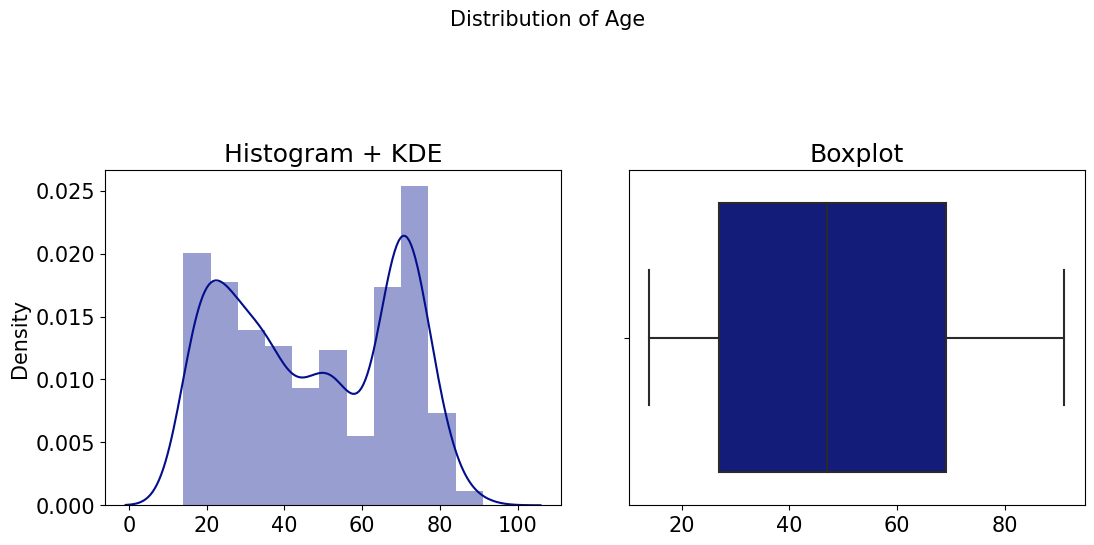

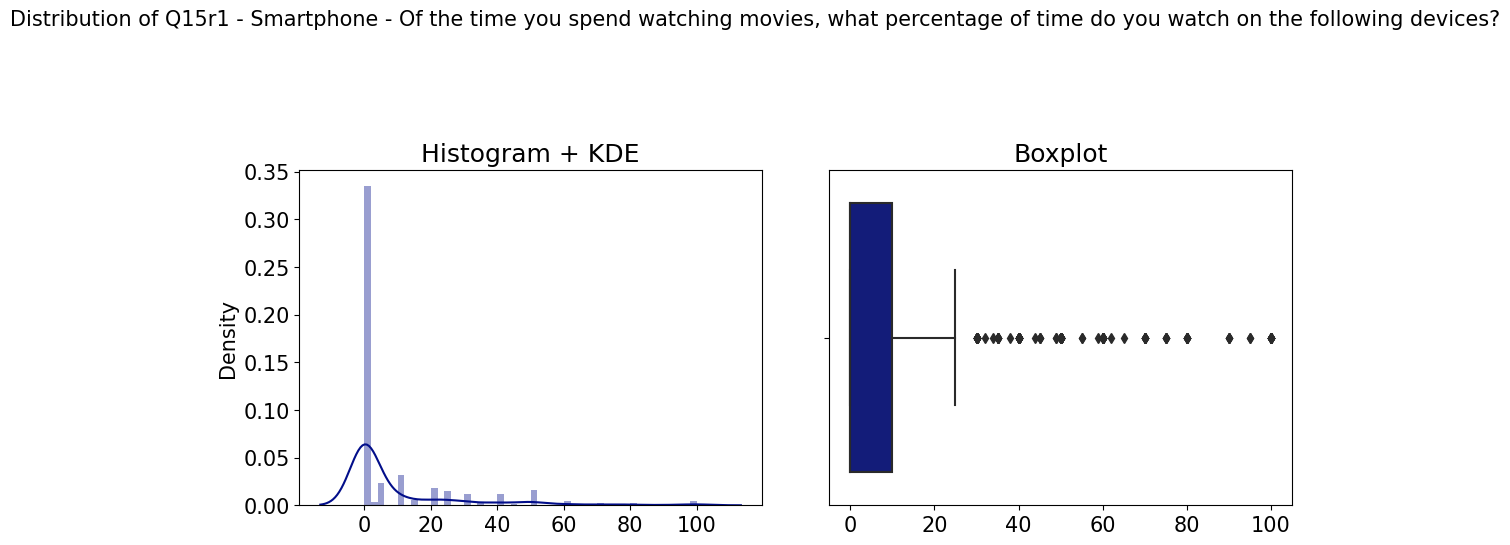

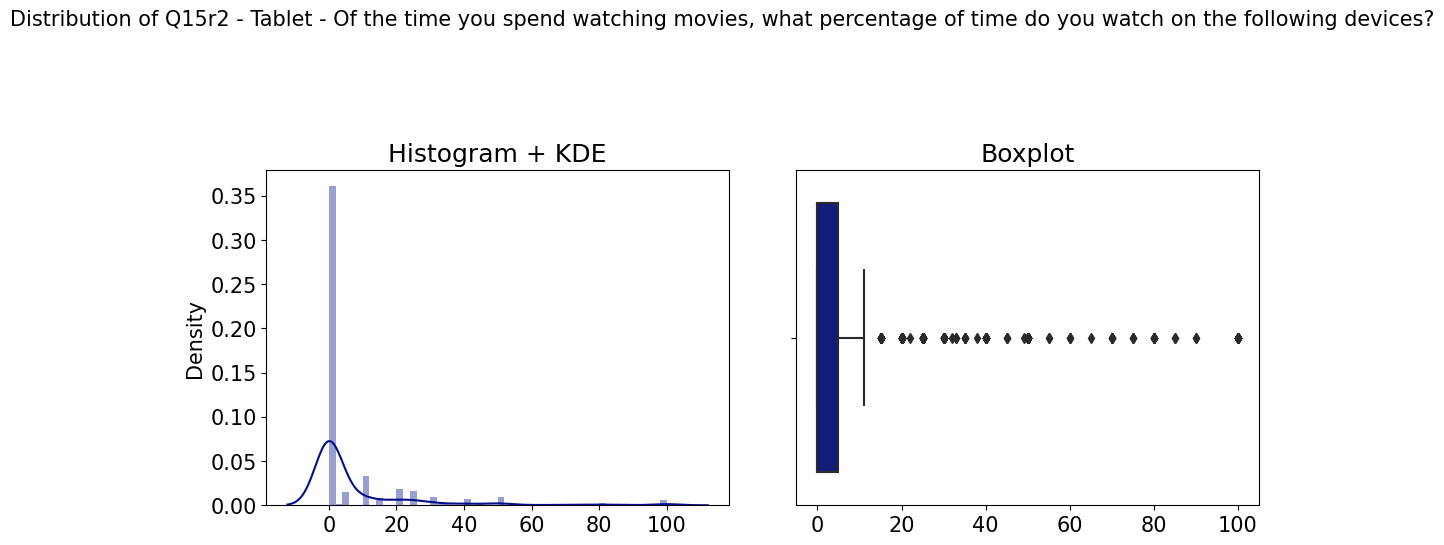

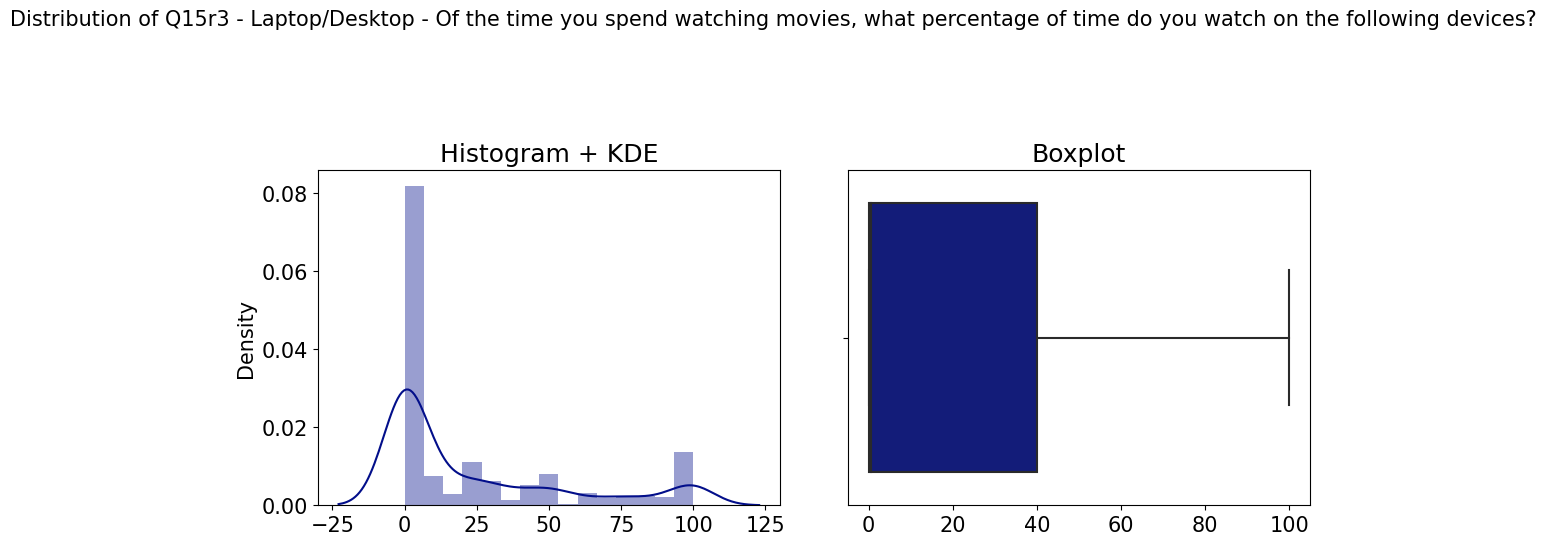

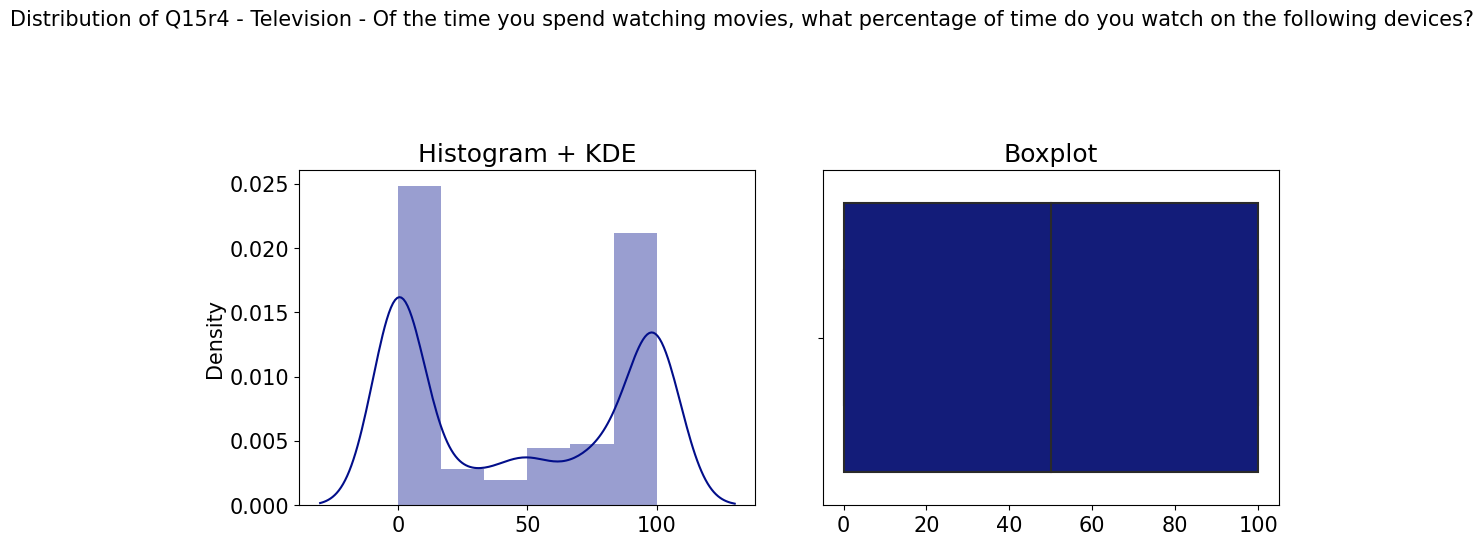

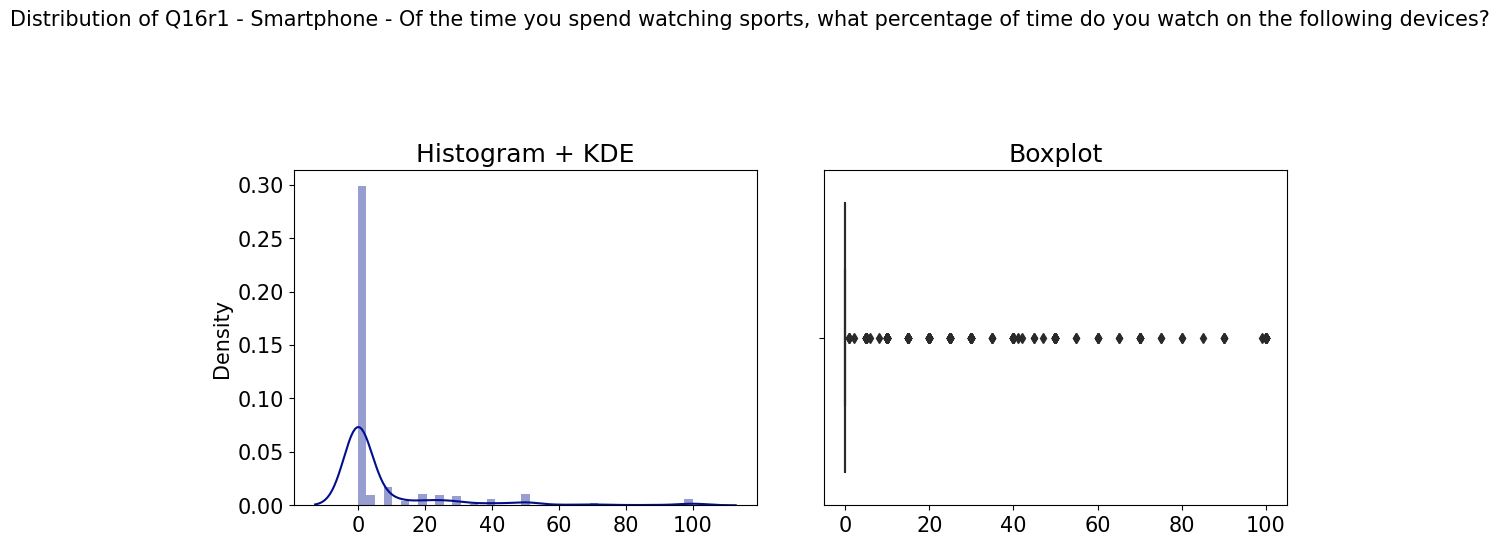

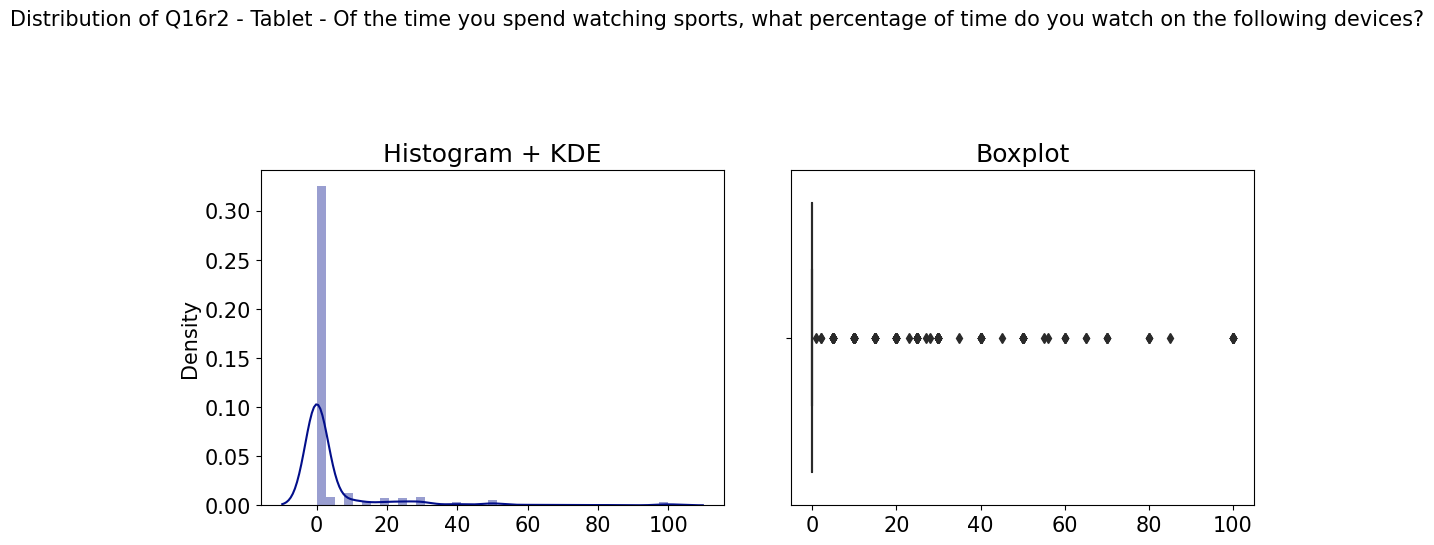

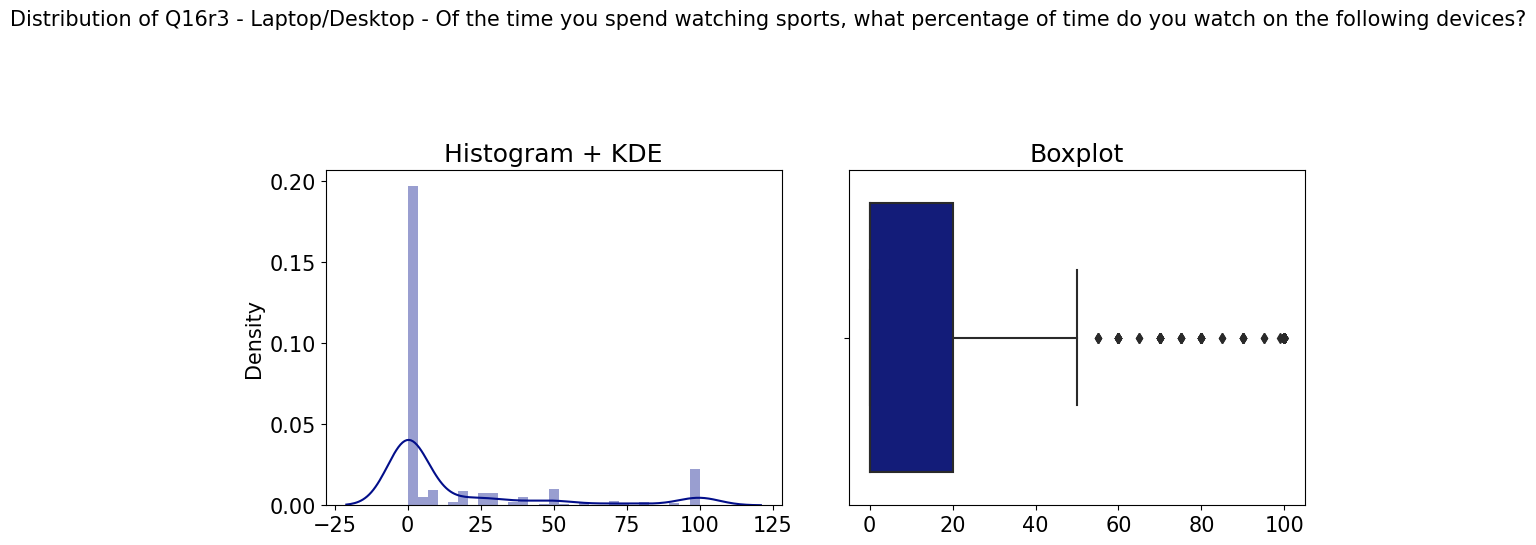

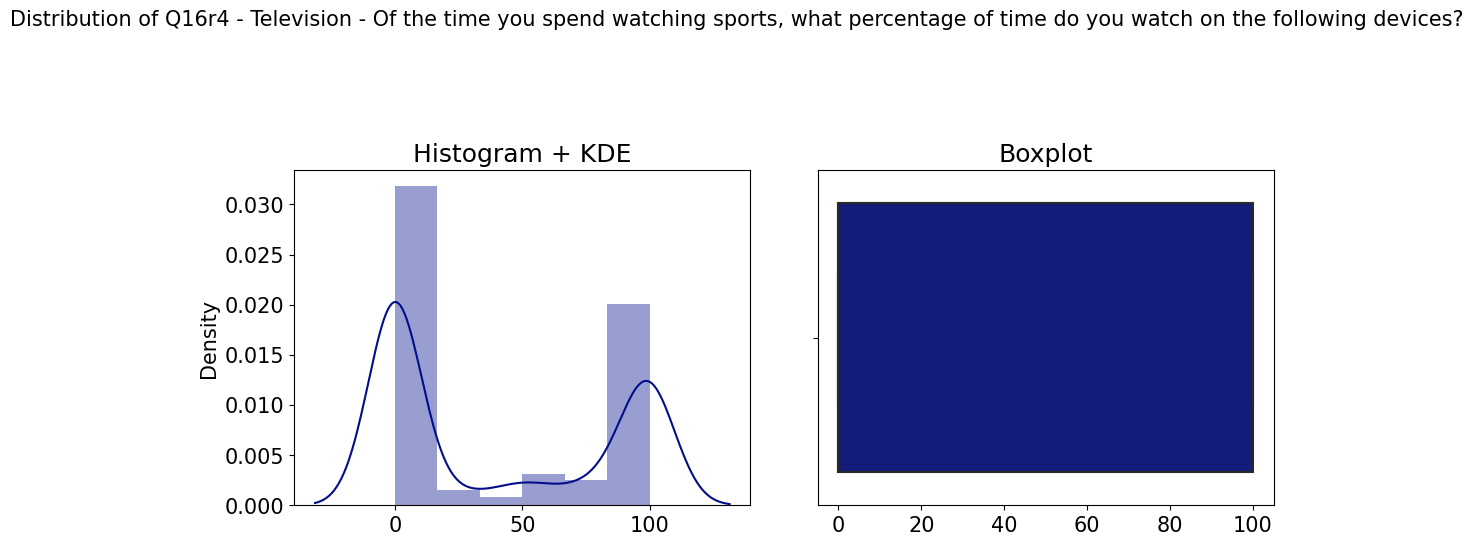

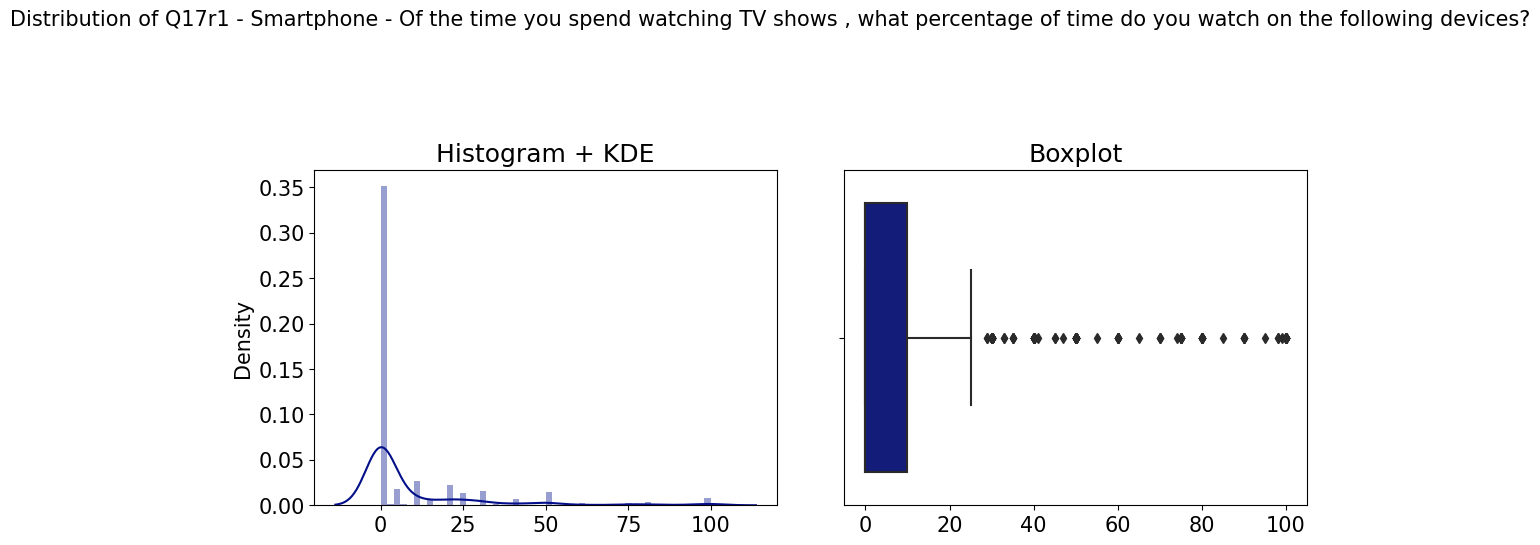

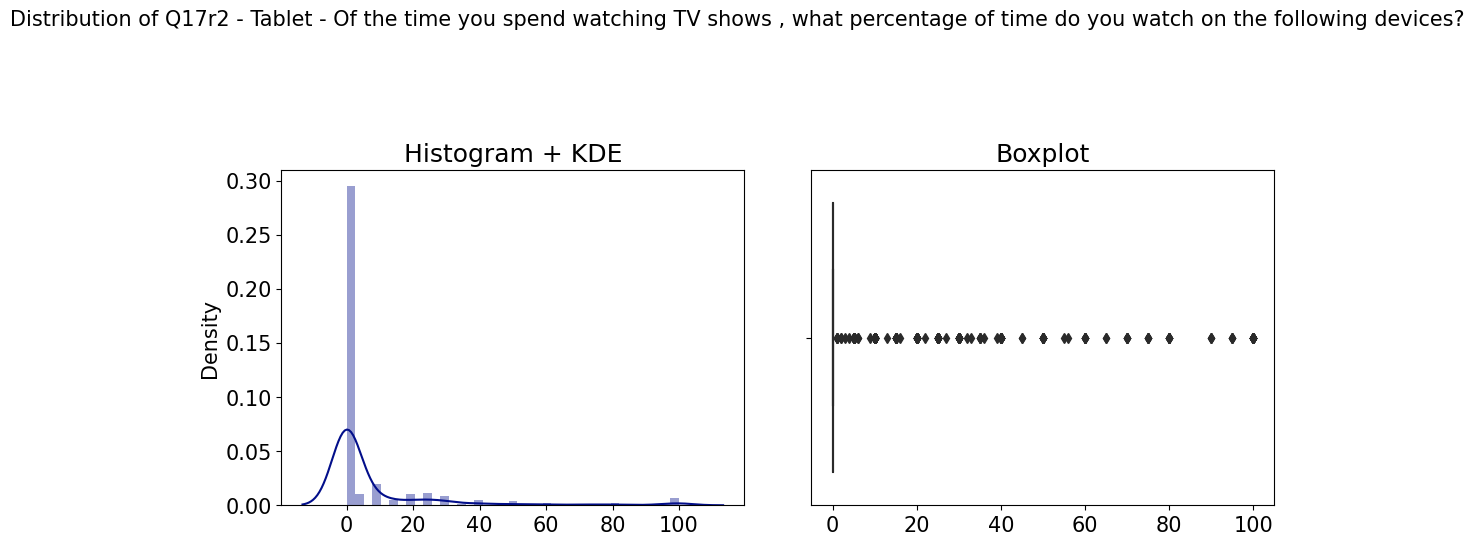

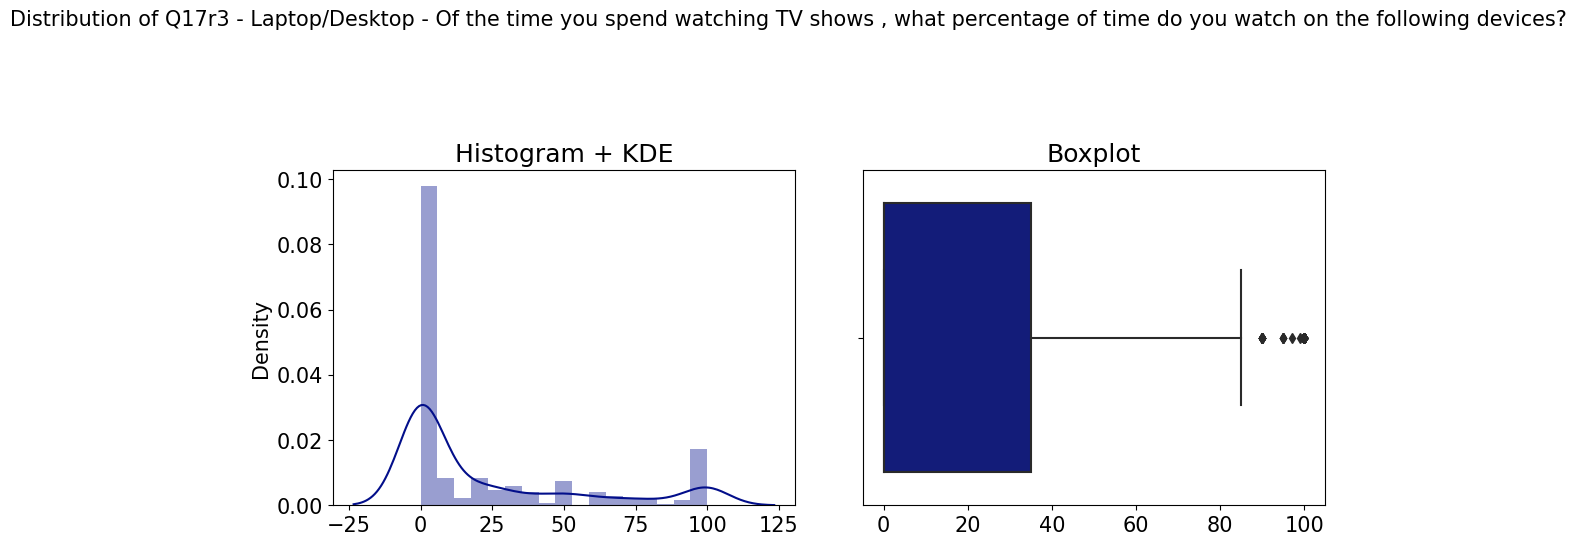

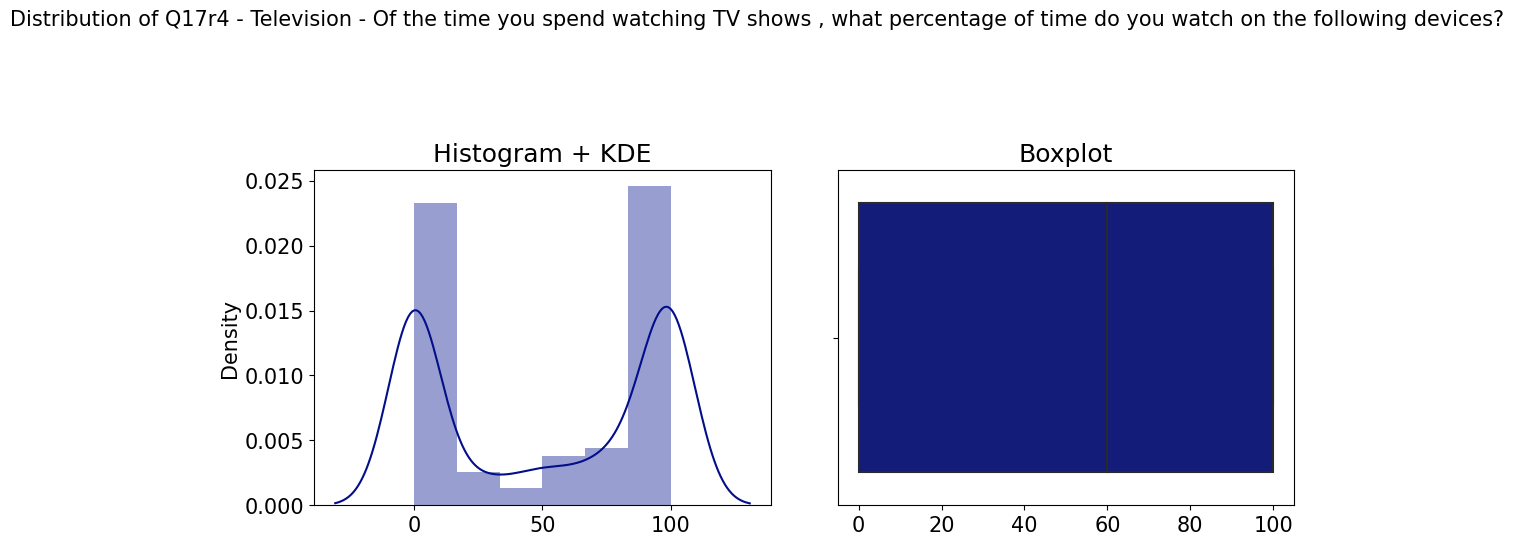

In [31]:
# univariate plots for numerical data
df_num = df_num.reset_index(drop=True)
for name in list(df_num.columns):
    plot_distribution(df_num[name],custom_colors[0], title="Distribution of " + name)

In [32]:
# univariate plots for categorical data

def plot_stacked(cols_list, col):
    df_new = df_cat[cols_list].copy()
    new_columns = [col.split('-', 2)[2] for col in df_new.columns]
    df_new.columns = new_columns
    
    # Drop rows with -999 values
    df_new = df_new[~df_new.isin([-999]).any(axis=1)]
    
    df_new = df_new.apply(pd.Series.value_counts).transpose()

    # Create a stacked bar chart
    df_new.plot(kind='bar', figsize=(16, 10))

    # Set the labels and title

    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title("Distribution of " + col)
    plt.xticks(rotation=40, ha='right')
    plt.show()

In [33]:
idx=df_cat.columns.get_loc("Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television")
idx1=df_cat.columns.get_loc("Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know")
idx, idx1
# Find out the range of columns to combine 


(8, 28)

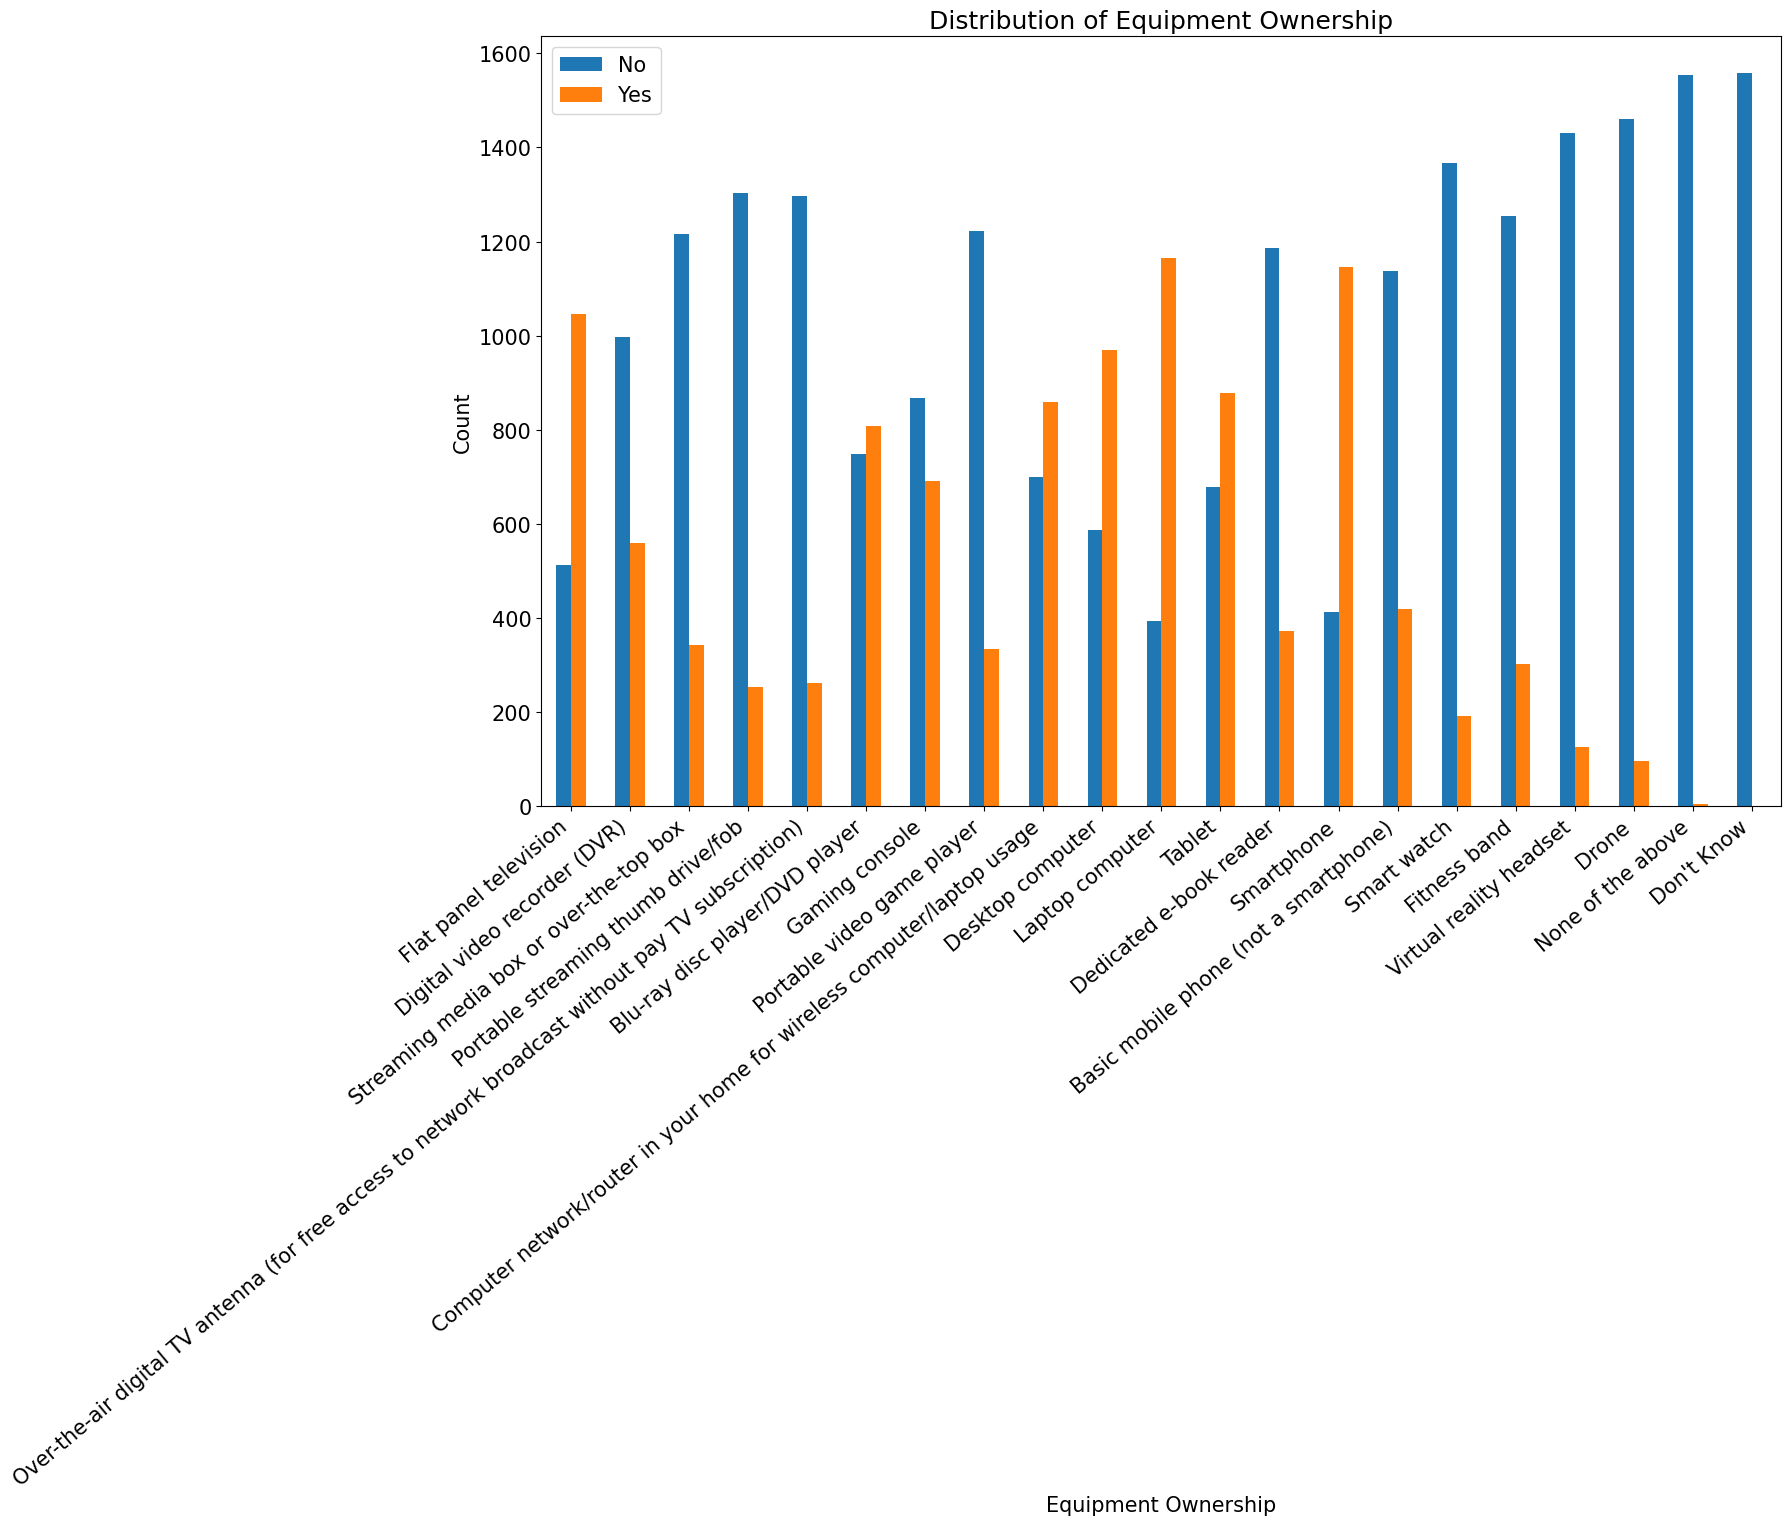

In [34]:
colss = []
for pos  in range (8,29):
    colss.append(df_cat.columns[pos])

plot_stacked(colss, "Equipment Ownership")


Now we get all Q10 together

In [35]:
idx=df_cat.columns.get_loc("Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television")
idx1=df_cat.columns.get_loc("Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Don't Know")
idx, idx1

(29, 49)

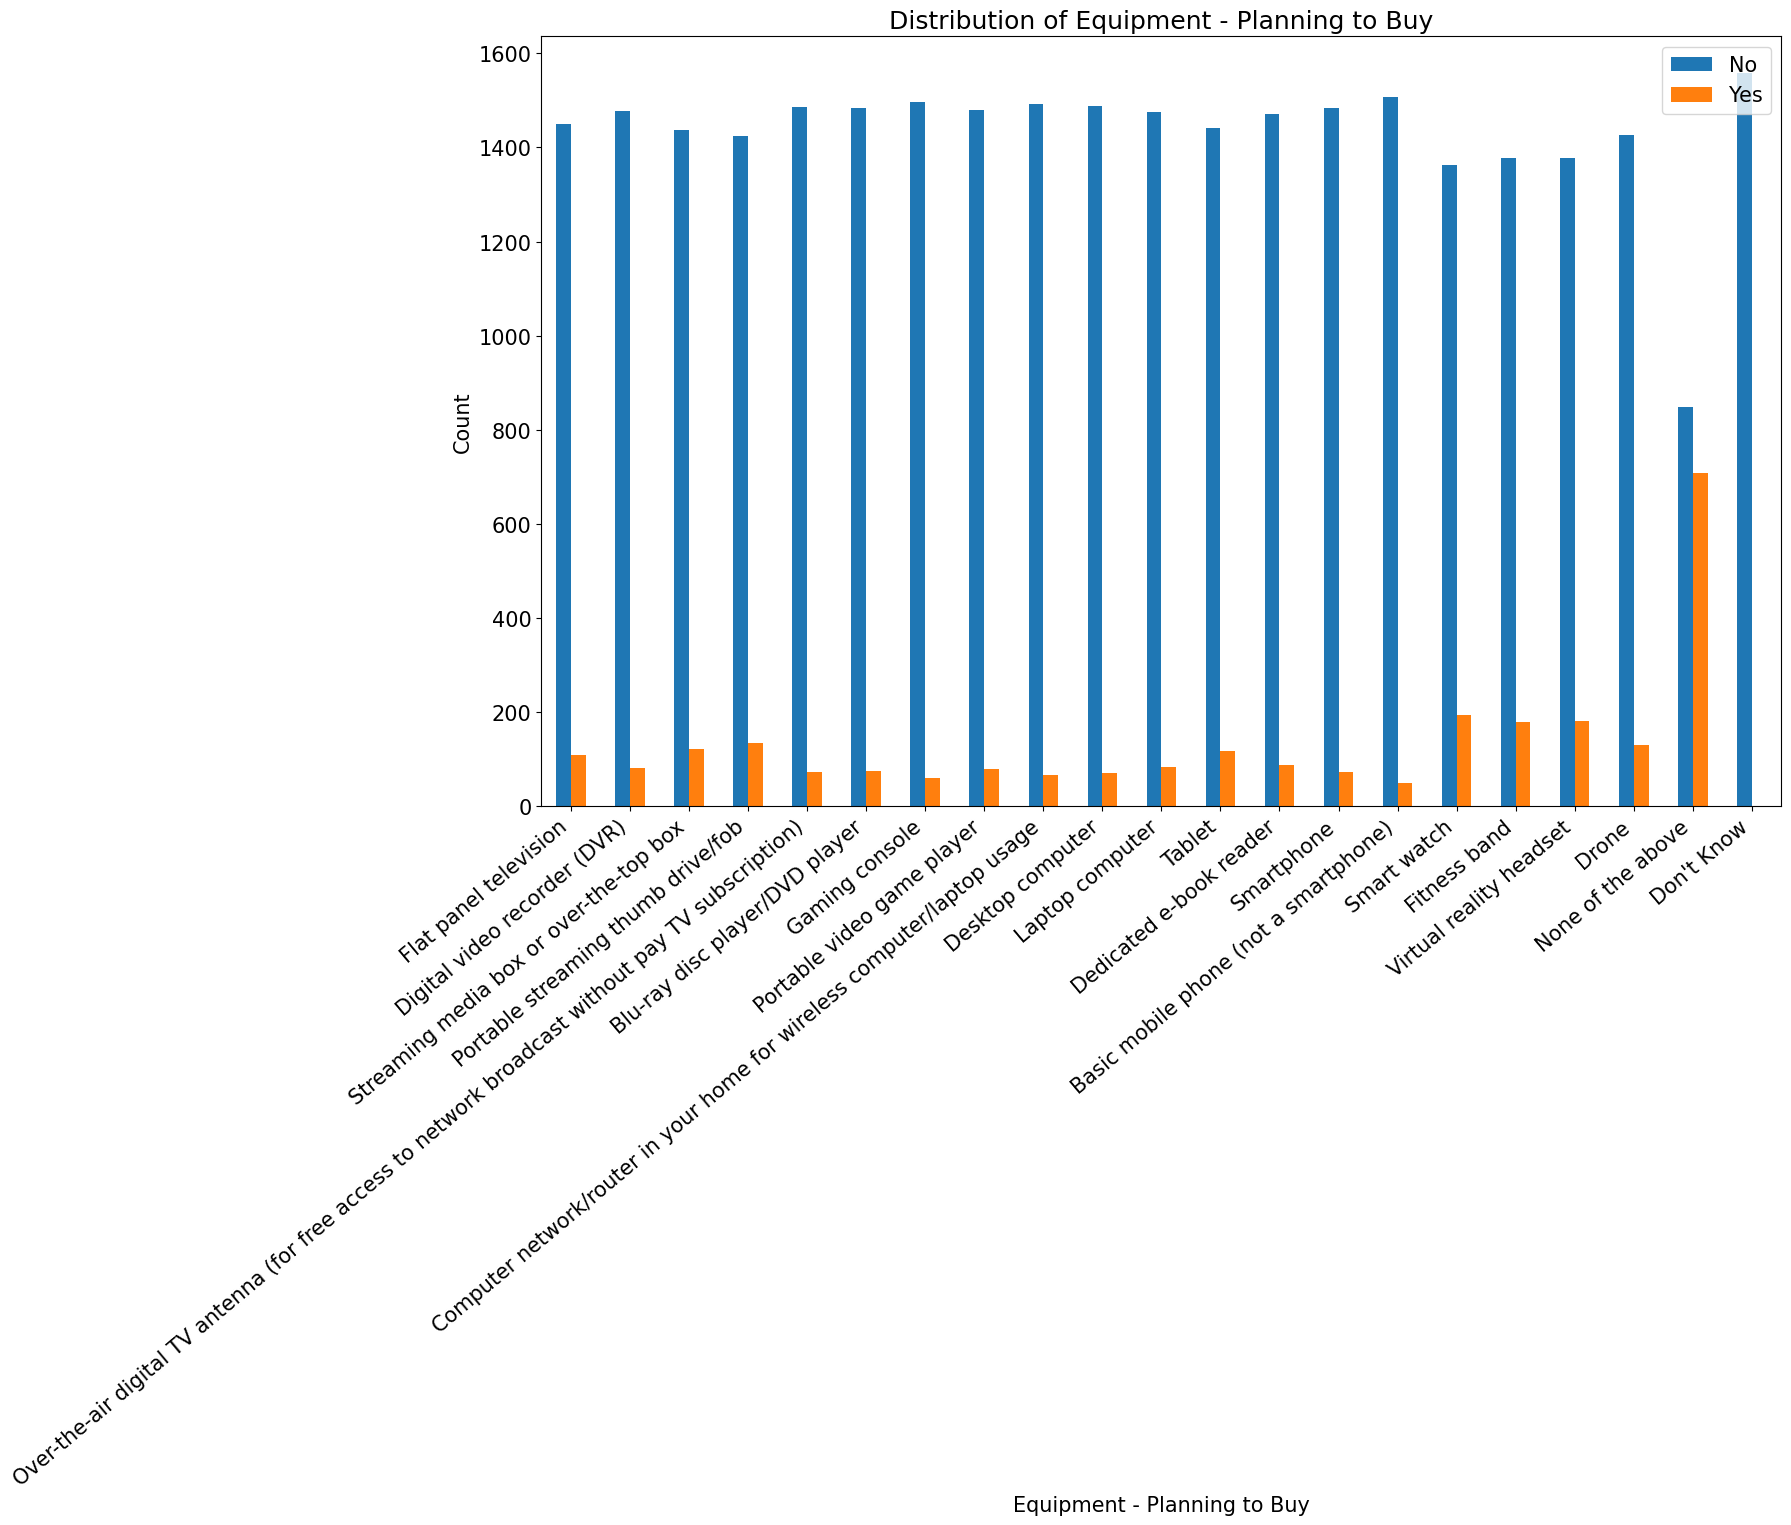

In [36]:
colss = []
for pos  in range (29,50):
    colss.append(df_cat.columns[pos])

plot_stacked(colss, "Equipment - Planning to Buy")

We can do similarly until exhausting all columns. Not doing here. 

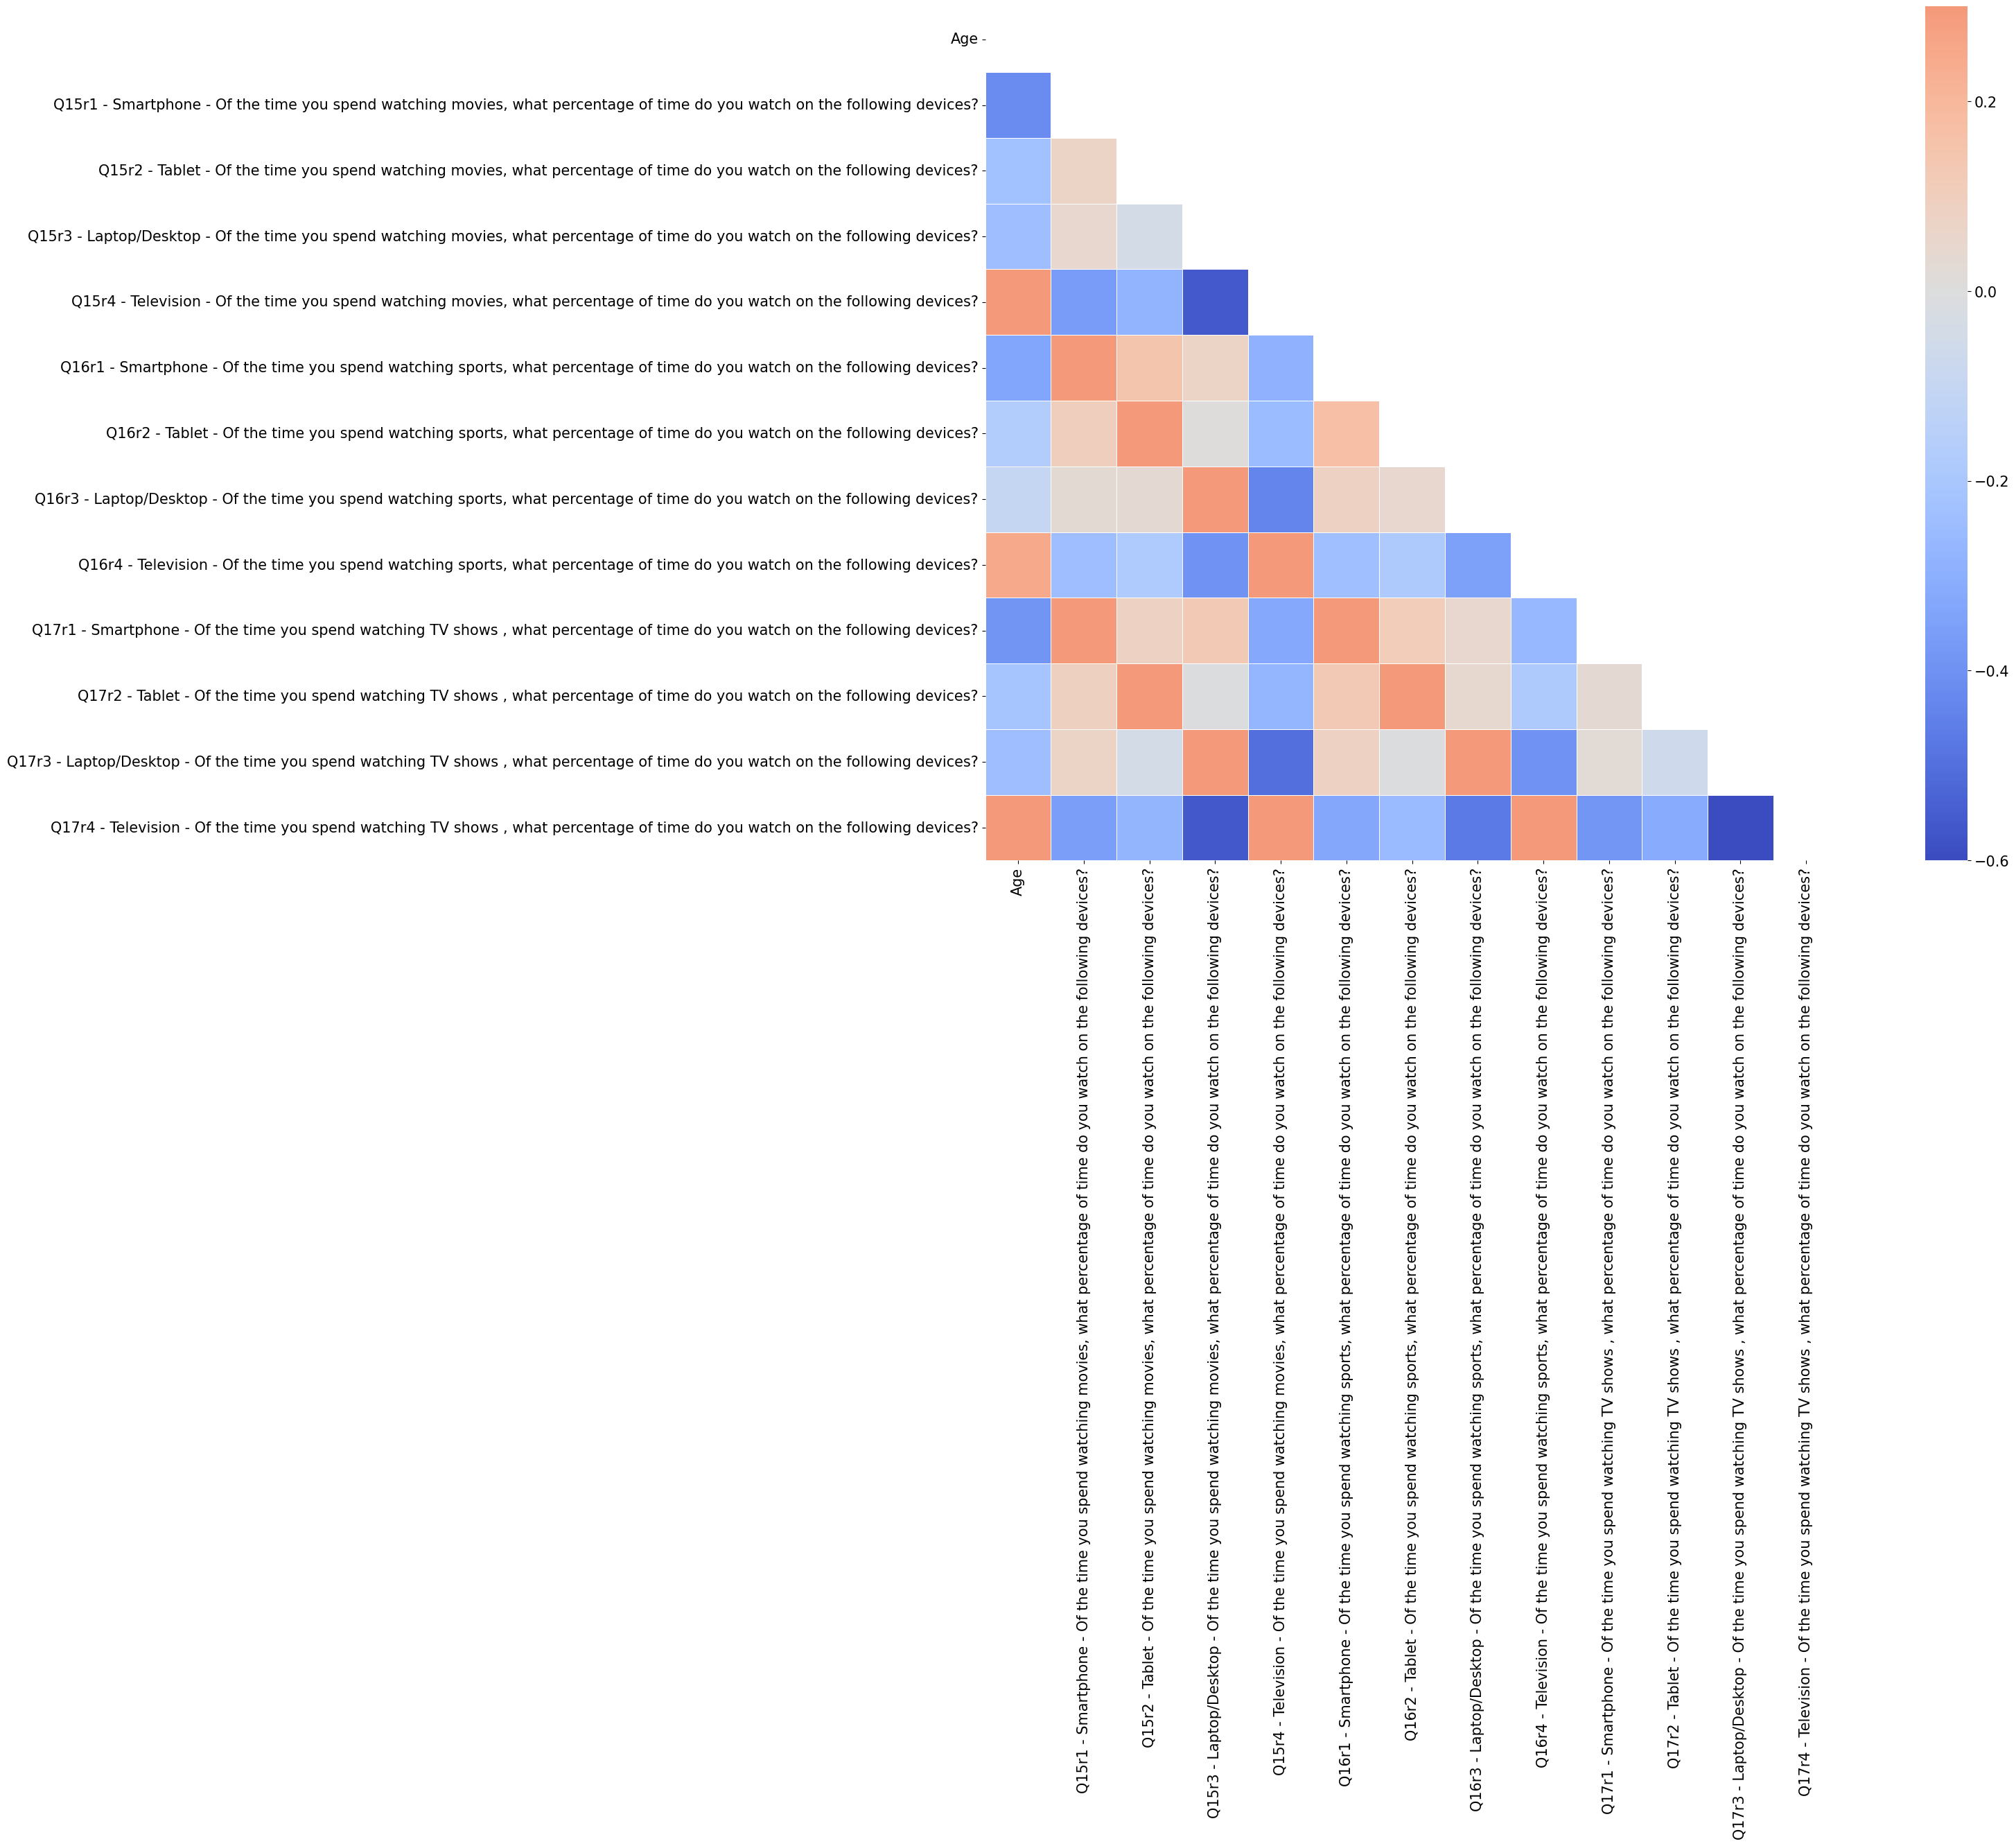

In [37]:
# generating a correlation heatmap
plt.figure(figsize=(32,16))

# calculating the correlation matrix for numerical columns
corr = df_num.astype(float).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5)
plt.show()

In [40]:
internet['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].unique()

array(['I am willing to pay $20 per month on top of what I already pay',
       'I am willing to pay $5 per month on top of what I already pay',
       'I am willing to pay $10 per month on top of what I already pay',
       'I prefer faster speed but I am unwilling to pay more than I already do',
       'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs',
       'I am willing to pay $30 or more per month on top of what I already pay'],
      dtype=object)

In [43]:
idx1=internet.columns.get_loc('Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?')
idx1

116

In [52]:
internet['Q29 - You said that you subscribe to home Internet access, how much more would you be willing to pay to receive double your download speed?'].replace({'I am willing to pay $20 per month on top of what I already pay':1,'I am willing to pay $5 per month on top of what I already pay':1,'I am willing to pay $10 per month on top of what I already pay':1,'I am willing to pay $30 or more per month on top of what I already pay':1,'I prefer faster speed but I am unwilling to pay more than I already do':0,'I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs':0},inplace=True)

In [56]:
def plot_bar(df, feat_x, feat_y,colors,s,normalize=True):
    ct = pd.crosstab(df[feat_x], feat_y)
    return ct.plot(kind='bar', stacked=s,color=colors)

def plot_barh(df, feat_x, feat_y,colors,s,normalize=True):
    ct = pd.crosstab(df[feat_x], feat_y)
    return ct.plot(kind='barh', stacked=s,color=colors)

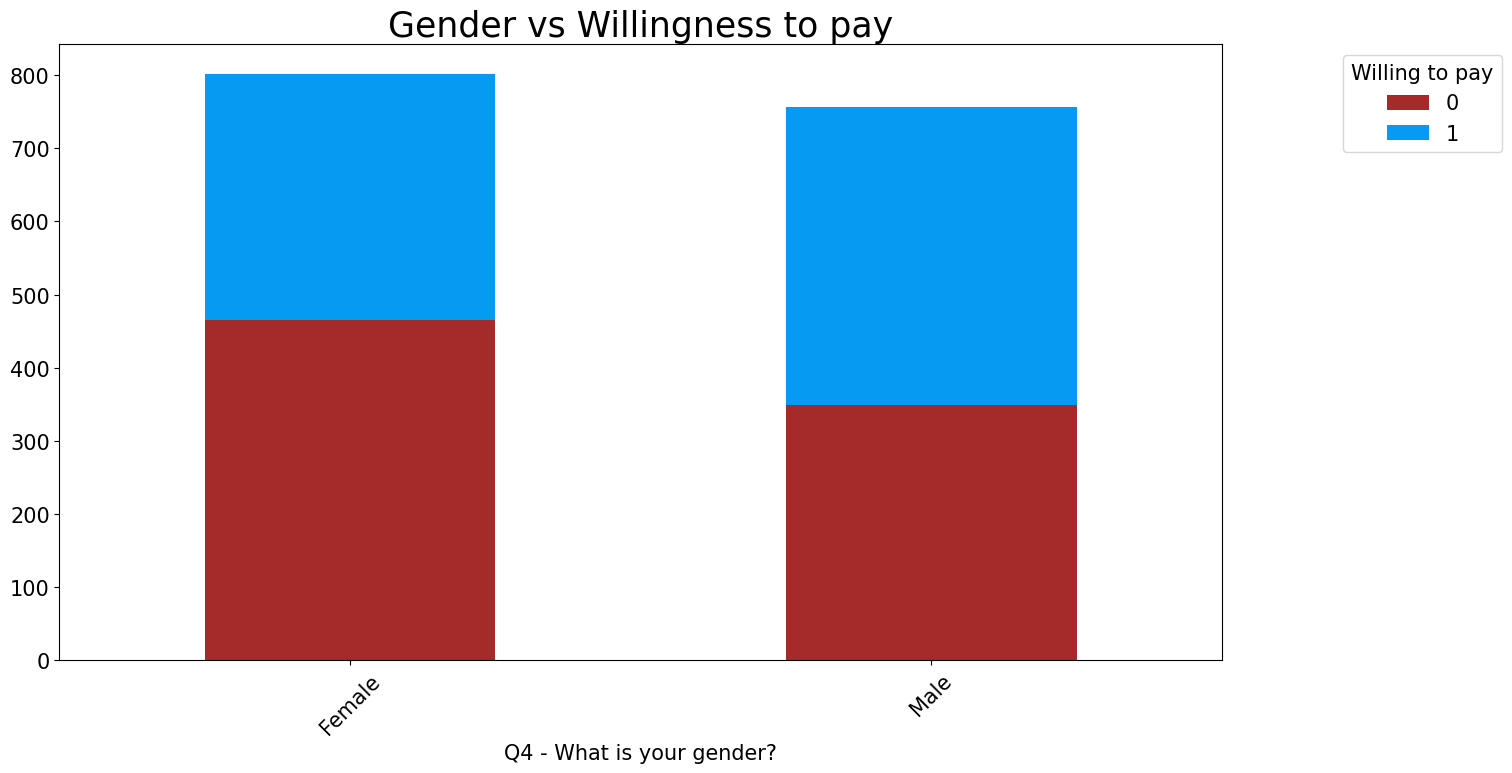

In [60]:
plot_bar(internet, 'Q4 - What is your gender?', internet.iloc[:,116,],["brown","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(15,8)
plt.xticks(rotation=45)
plt.title('Gender vs Willingness to pay', fontsize=25)
plt.xticks(fontsize=15)
plt.show()

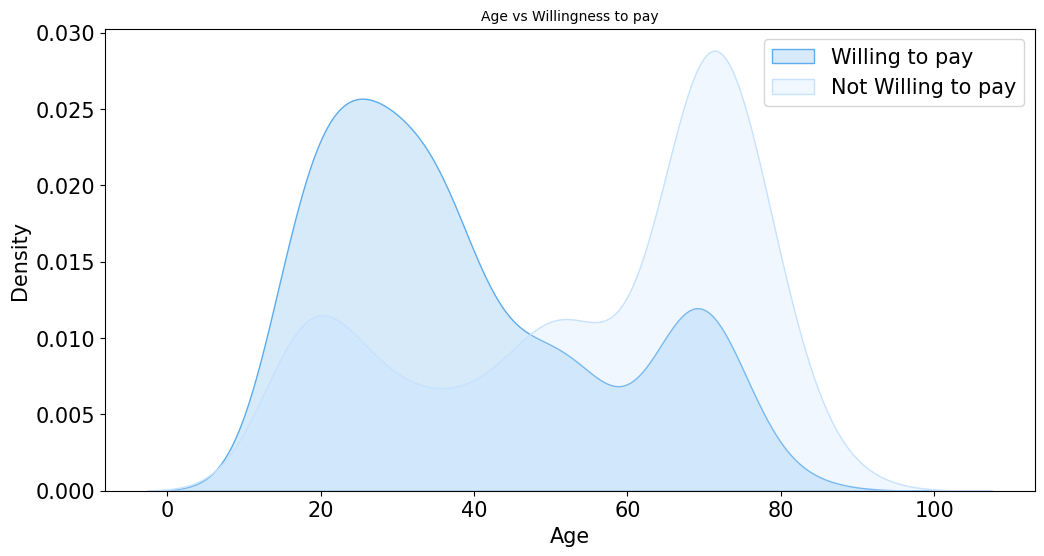

In [64]:
sns.kdeplot(internet['Age'].astype(float)[internet.iloc[:,116,] == 1], color="#5CACEE", shade=True)
sns.kdeplot(internet['Age'].astype(float)[internet.iloc[:,116,] == 0], color="#C6E2FF", shade=True)
plt.legend(['Willing to pay', 'Not Willing to pay'])
plt.gcf().set_size_inches(12,6)
plt.title('Age vs Willingness to pay', fontsize=10)
plt.xticks(fontsize=15)
plt.show()

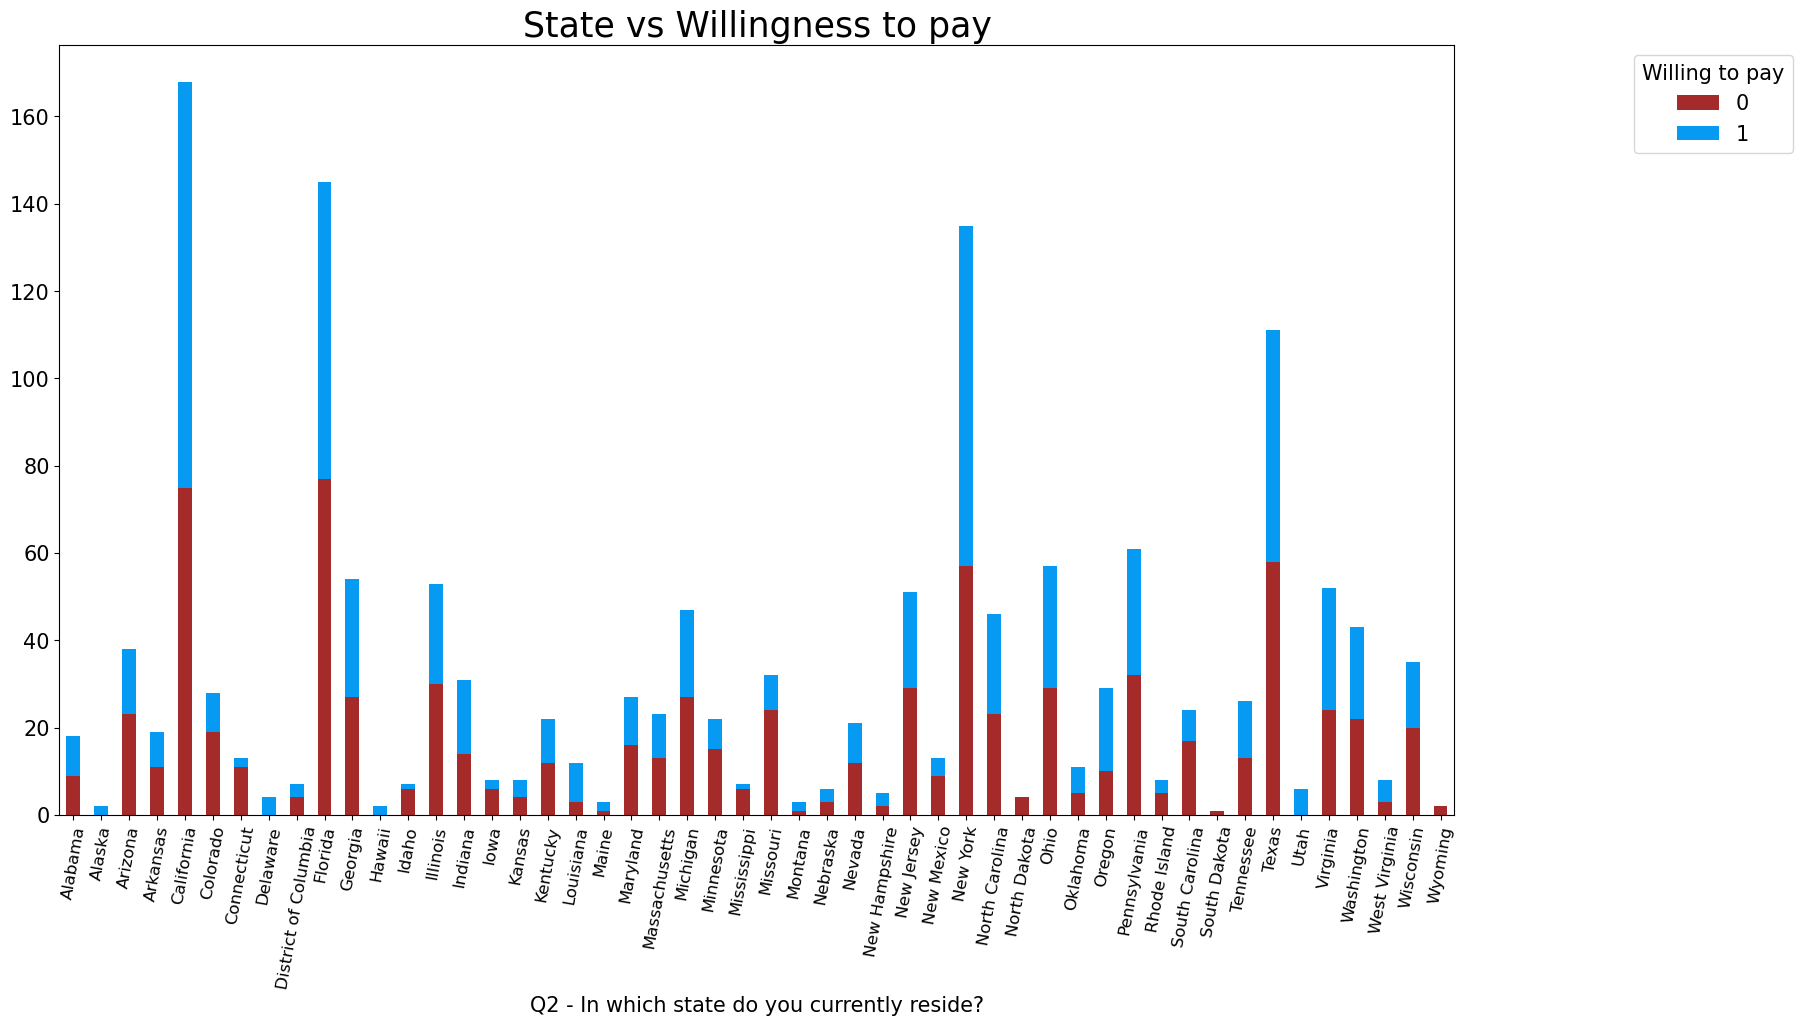

In [67]:
plot_bar(internet, 'Q2 - In which state do you currently reside?', internet.iloc[:,116,],["brown","#069AF3"],True)
plt.legend(title='Willing to pay',loc='upper right',bbox_to_anchor=(1.25, 1))
plt.gcf().set_size_inches(18,10)
plt.xticks(rotation=80)
plt.title('State vs Willingness to pay', fontsize=25)
plt.xticks(fontsize=12)
plt.show()

In [68]:
# replacing Yes with 1 and No with 0
internet.replace({'Yes':1,'No':0},inplace=True)
internet.head()

,Age,Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray

In [71]:
one_hot_cols = list(pd.concat([internet.iloc[:,1:7],internet.iloc[:,8,],internet.iloc[:,119:130,],internet.iloc[:,131:,]],axis=1).columns)
#one_hot_cols
one_hot_df = pd.get_dummies(internet[one_hot_cols])

# combining the original DataFrame with the one-hot encoded DataFrame
new_df = pd.concat([internet, one_hot_df], axis=1)

# dropping the original columns that were one-hot encoded
new_df.drop(columns=one_hot_cols, inplace=True)

new_df.head()


,Age,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable streaming thumb drive/fob","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Blu-ray disc player/DVD player","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Gaming console","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Portable video game player","Q10 - Of those products you indicated y

In [72]:
# Saving the preprocessed data
new_df.to_csv("Preprocessed_data.csv", index=False)